# Data Science Lab - Task 4
> Author: Alexandre Charoy, 448140
>
> Date: 16.06.2019

## Fetch dataset

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Fetch data
mnist = fetch_mldata('MNIST original')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# Create pandas object that will be used for stats and vizualization
labels = pd.Series(mnist.target).astype('int').astype('category')
df = pd.DataFrame(mnist.data)
num_images = df.shape[1]
df.columns = ['pixel_'+str(x) for x in range(num_images)]

## Some stats

In [4]:
values = pd.Series(df.values.ravel())
print(" min: {}, \n max: {}, \n mean: {}, \n median: {}, \n most common value: {}".format(values.min(), values.max(), values.mean(), values.median(), values.value_counts().idxmax()))

 min: 0, 
 max: 255, 
 mean: 33.385964741253645, 
 median: 0.0, 
 most common value: 0


## Vizualisation

Showing 9 random digits from the dataset.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


<Figure size 432x288 with 0 Axes>

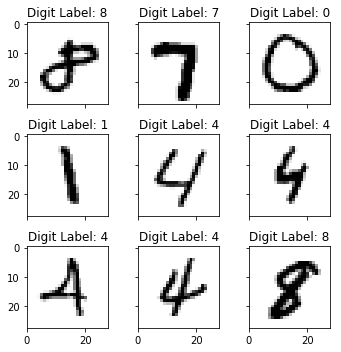

In [5]:
images_to_plot = 9
random_indices = random.sample(range(70000), images_to_plot)
sample_images = df.loc[random_indices, :]
sample_labels = labels.loc[random_indices]
plt.clf()
plt.style.use('seaborn-muted')
fig, axes = plt.subplots(3,3, figsize=(5,5), sharex=True, sharey=True, subplot_kw=dict(adjustable='box-forced', aspect='equal'))
for i in range(images_to_plot):
    subplot_row = i//3 
    subplot_col = i%3  
    ax = axes[subplot_row, subplot_col]
    plottable_image = np.reshape(sample_images.iloc[i,:].values, (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    ax.set_title('Digit Label: {}'.format(sample_labels.iloc[i]))
    ax.set_xbound([0,28])
plt.tight_layout()
plt.show()

## Preprocess and split data

In [6]:
data = StandardScaler().fit_transform(mnist.data)

train, test, train_lbl, test_lbl = train_test_split(data, mnist.target, test_size=2/7.0, random_state=0)
test, validate, test_lbl, validate_lbl = train_test_split(test, test_lbl, test_size=3.5/7.0, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Train classifier

In [7]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(train, train_lbl)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Cross-validation scoring

In [8]:
scores = cross_val_score(classifier, validate, validate_lbl)
print(scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79412646 0.80023995 0.79212977]


The trained classifier correctly predicts digits of the MNIST dataset in approximatively 80% of the cases.